1. Gerekli kütüphaneler

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression

2. Veriyi okuma

In [38]:
# Tüm veriyi yükle
train_df = pd.read_csv("datasets/processed_train_data.csv")
test_df = pd.read_csv("datasets/processed_test_data.csv")


# Özellik ve hedef ayır
X_train = train_df_sample.drop(columns=["Thyroid_Cancer_Risk"])
y_train = train_df_sample["Thyroid_Cancer_Risk"]
X_test = test_df_sample.drop(columns=["Thyroid_Cancer_Risk"])
y_test = test_df_sample["Thyroid_Cancer_Risk"]

3. Rastgele gürültü ekleyerek hedefi yumuşatma

In [39]:
# Küçük rastgele sapma (noise) ekleyerek hedefi yumuşat
y_train += np.random.normal(0, 0.1, size=y_train.shape)
y_test += np.random.normal(0, 0.1, size=y_test.shape)

4. En iyi öznitelik seçimi

In [40]:
selector = SelectKBest(score_func=f_regression, k=10)
X_train_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

5. Farklı quantile değerleriyle model eğitimi

In [41]:
from sklearn.linear_model import QuantileRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

quantiles = [0.25, 0.5, 0.75]
results = {}

for q in quantiles:
    print(f"\n🎯 Quantile: {q}")
    
    # Model oluştur (max_iter YOK!)
    model = QuantileRegressor(
        quantile=q,
        alpha=0,
        solver="highs"
    )
    
    # Modeli eğit
    model.fit(X_train, y_train)
    
    # Tahmin yap
    y_pred = model.predict(X_test)
    
    # Metrikleri hesapla
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Sonuçları kaydet
    results[q] = {
        'model': model,
        'y_pred': y_pred,
        'R²': r2,
        'MSE': mse,
        'MAE': mae
    }
    
    # Sonuçları yazdır
    print(f"  R² Skoru: {r2:.4f}")
    print(f"  MSE     : {mse:.4f}")
    print(f"  MAE     : {mae:.4f}")


🎯 Quantile: 0.25
  R² Skoru: -0.6738
  MSE     : 0.9467
  MAE     : 0.6956

🎯 Quantile: 0.5
  R² Skoru: 0.1041
  MSE     : 0.5067
  MAE     : 0.5471

🎯 Quantile: 0.75
  R² Skoru: -0.3063
  MSE     : 0.7388
  MAE     : 0.7024


6. Tahminlerin görselleştirilmesi

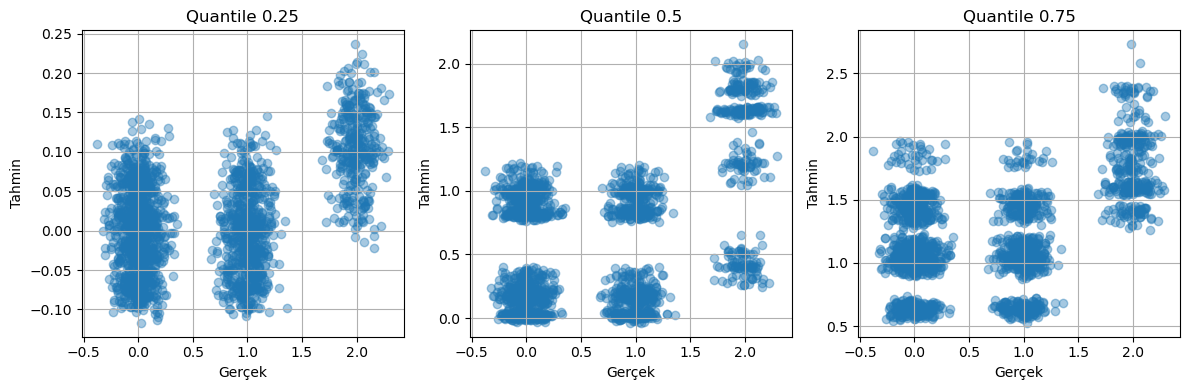

In [35]:
plt.figure(figsize=(12, 4))
for i, q in enumerate(quantiles):
    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, results[q]['y_pred'], alpha=0.4)
    plt.title(f"Quantile {q}")
    plt.xlabel("Gerçek")
    plt.ylabel("Tahmin")
    plt.grid(True)
plt.tight_layout()
plt.show()

7. Tabloda göster

In [36]:
# Özet tabloyu tek seferde yazdır
summary = pd.DataFrame(results).T[['R²', 'MSE', 'MAE']]
print("\nKantil Regresyon Sonuç Özeti:")
print(summary)


Kantil Regresyon Sonuç Özeti:
            R²       MSE       MAE
0.25 -0.675759  0.946012  0.701702
0.50  0.127635  0.492474  0.548728
0.75 -0.299696  0.733713  0.698681
